In [1]:
import pandas as pd
import numpy as np

In [2]:
from itertools import zip_longest

def find_shape(seq):
    try:
        len_ = len(seq)
    except TypeError:
        return ()
    shapes = [find_shape(subseq) for subseq in seq]
    return (len_,) + tuple(max(sizes) for sizes in zip_longest(*shapes,
                                                                fillvalue=1))

def fill_array(arr, seq):
    if arr.ndim == 1:
        try:
            len_ = len(seq)
        except TypeError:
            len_ = 0
        arr[:len_] = seq
        arr[len_:] = 0
    else:
        for subarr, subseq in zip_longest(arr, seq, fillvalue=()):
            fill_array(subarr, subseq)

In [3]:
rads = ['n2n2','ttbar','wmp','zwpm']
n21_dict = {}
n32_dict = {}
no_of_misses = {}

for rad in rads:
    n21_l = []
    n32_l = []
    for i in range(1,11):
        f = open('/home/blizzard/Datasets/NSubJet/R80/' + rad + '3' + str(i) + '.p5')
        line = f.readline()
        while line:
            if line != ";\n" or "\n":
                comb_list = line.split(';')
                n21_arr = comb_list[0].split(',')
                n32_arr = comb_list[1].split(',')

                n21 = []
                n32 = []
                
                for j in range(len(n21_arr)):
                    try:
                        if float(n21_arr[j]) <= 1 and float(n32_arr[j]) <= 1:
                            n21.append(float(n21_arr[j]))
                            n32.append(float(n32_arr[j]))
                    except:
                        pass
                n21_l.append(n21)
                n32_l.append(n32)
                
                line = f.readline()
    
    n21_dict[rad] = n21_l
    n32_dict[rad] = n32_l    

In [4]:
for rad in rads:
    arr = np.empty(find_shape(n21_dict[rad]))
    fill_array(arr, n21_dict[rad])
    n21_dict[rad] = arr

    arr = np.empty(find_shape(n32_dict[rad]))
    fill_array(arr, n32_dict[rad])
    n32_dict[rad] = arr

In [5]:
for rad in rads:
    n21_dict[rad] = n21_dict[rad][:,:11]
    #print(n21_dict[rad].shape)

In [6]:
con_df = []
for j,rad in enumerate(rads):
    df = {}
    
    for i in range(11):
        if 'n21_' + str(i) not in df:
            df['n21_' + str(i)] = n21_dict[rad][:,i]
        else:
            df['n21_' + str(i)].append(n21_dict[rad][:,i])
    
    df['type'] = [j]*len(n21_dict[rad])

    if rad == 'n2n2':
        df['tag'] = [1]*len(n21_dict[rad])
    else:
        df['tag'] = [0]*len(n21_dict[rad])
    
    con_df.append(df)

In [7]:
tot = []
for i,_ in enumerate(rads):
    df = pd.DataFrame(con_df[i])
    tot.append(df)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.utils import shuffle
from PIL import ImageFont
import visualkeras

2022-03-23 13:01:56.340896: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/blizzard/Research/tools/fastjet-install//lib:/home/blizzard/Research/tools/root/lib:/home/blizzard/Research/tools/madGraph/Delphes:/home/blizzard/Research/tools/madGraph/ExRootAnalysis
2022-03-23 13:01:56.340975: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
dtset = pd.concat(tot,ignore_index=True)
dtset = shuffle(dtset)

In [10]:
dtset.head()

,n21_0,n21_1,n21_2,n21_3,n21_4,n21_5,n21_6,n21_7,n21_8,n21_9,n21_10,type,tag
3386655,0.563085,0.360488,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,3,0
2885784,0.254825,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,2,0
2849158,0.401014,0.464162,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,2,0
1023326,0.309413,0.531005,0.599956,0.428901,0.656311,0.63714,0.0,0.0,0.0,0.0,0.0,1,0
677832,0.545792,0.460634,0.485639,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0,1


In [11]:
train_len = int(0.8*len(dtset))
x_train = dtset.T[:-1].T[:train_len]
y_train = dtset['tag'][:train_len]

x_test = dtset.T[:-1].T[train_len:]
y_test = dtset['tag'][train_len:]

print('Shapes : ',x_train.shape,y_train.shape,x_test.shape,y_test.shape)

In [4]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('seaborn')
import matplotlib.pyplot as ptl

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='n21', ylabel='n32'>

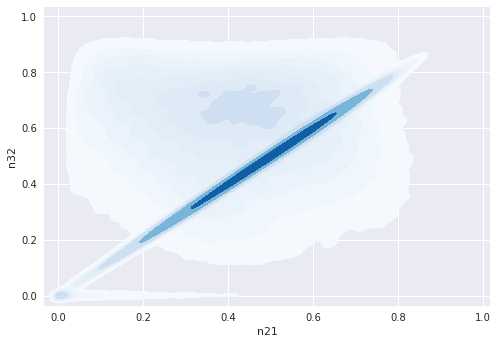

In [9]:
sns.kdeplot(x = df.n21,y = df.n32,cmap="Blues",shade=True,bw_adjust=.5)

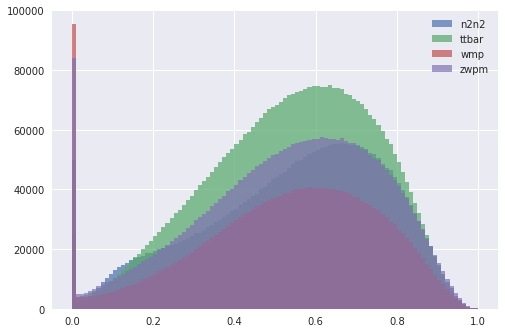

In [6]:
for rad in rads:
    ptl.hist(n32_dict[str(rad)],bins=100,alpha=0.7)
ptl.legend(rads)
ptl.show()

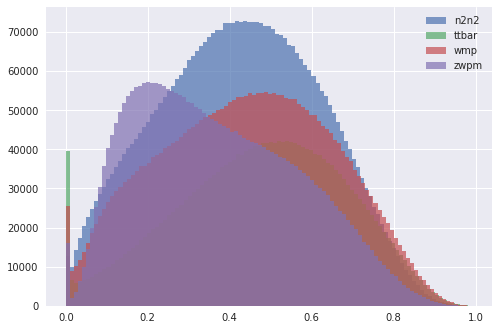

In [7]:
for rad in [*rads[1:],rads[0]]:
    ptl.hist(n21_dict[str(rad)],bins=100,alpha=0.7)
ptl.legend(rads)
ptl.show()

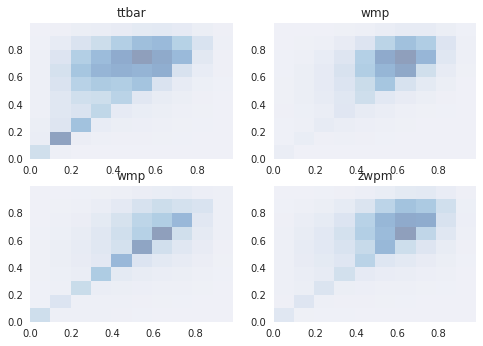

In [25]:
figure, axis = ptl.subplots(2, 2)

for i in range(2):
    for j in range(2):
        if i == 1:
            axis[i,j].hist2d(n21_dict[rads[i+j+1]],n32_dict[rads[i+j+1]],bins=(10,10),cmap="Blues",alpha=0.4)
            axis[i,j].set_title(rads[i+j+1])
        else:    
            axis[i,j].hist2d(n21_dict[rads[i+j]],n32_dict[rads[i+j]],bins=(10,10),cmap="Blues",alpha=0.4)
            axis[i,j].set_title(rads[i+j+1])
ptl.show()

[]

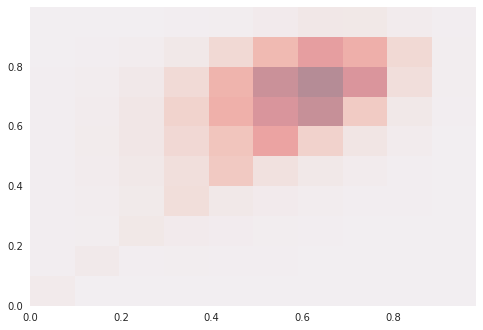

In [23]:
ptl.hist2d(n21_dict['ttbar'],n32_dict['ttbar'],bins=(10,10),cmap="Reds",alpha=0.4)
ptl.plot()

In [29]:
for rad in rads:
    print(rad, len(n32_dict['R' + str(rad)]))

n2n2 3053892
ttbar 4210907
wmp 2287068


The amount is :  1


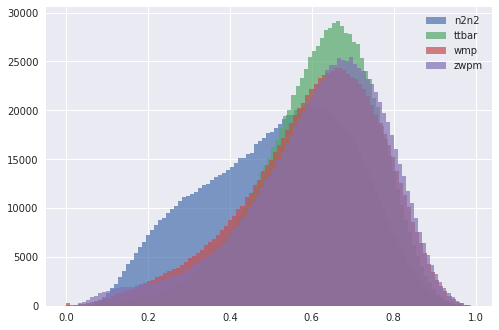

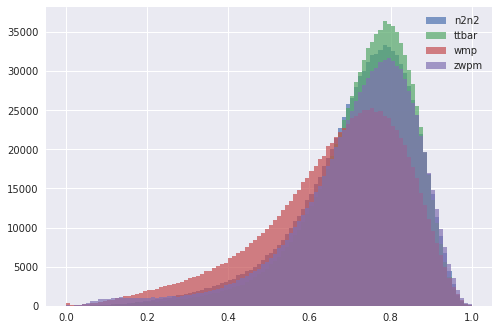

The amount is :  2


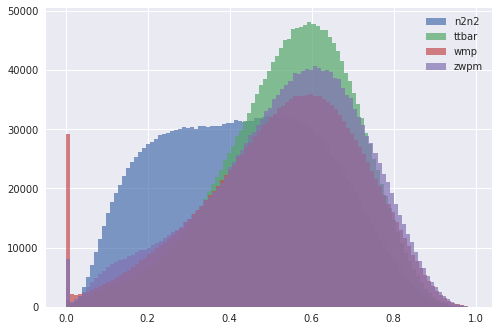

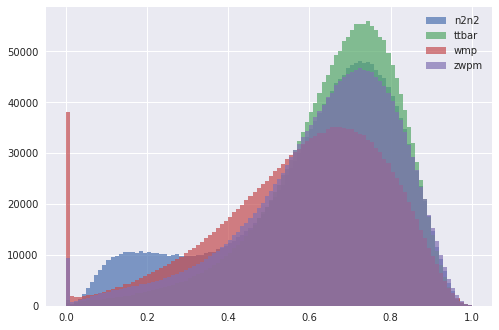

The amount is :  3


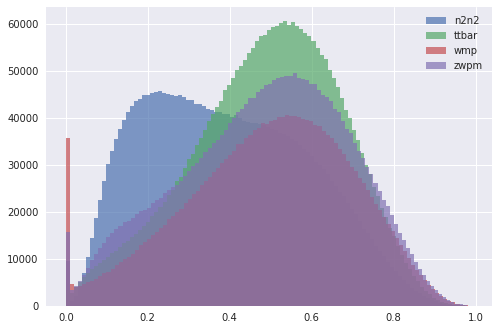

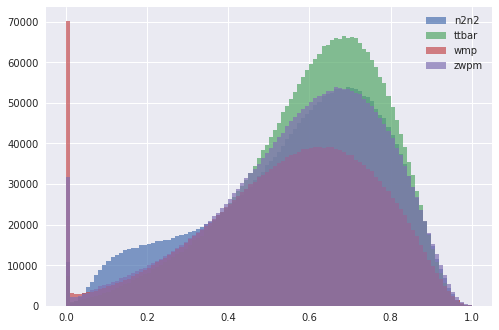

The amount is :  4


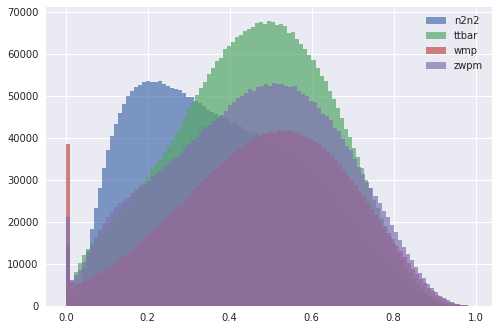

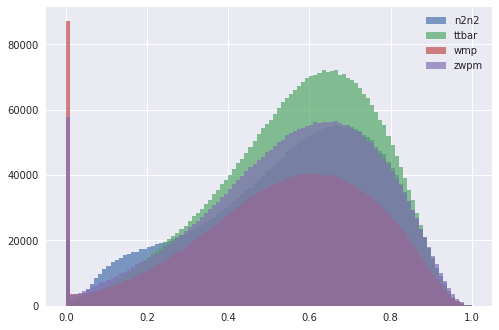

The amount is :  5


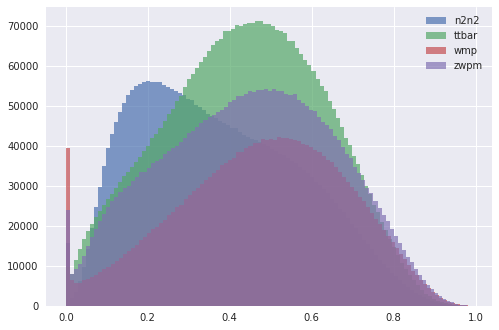

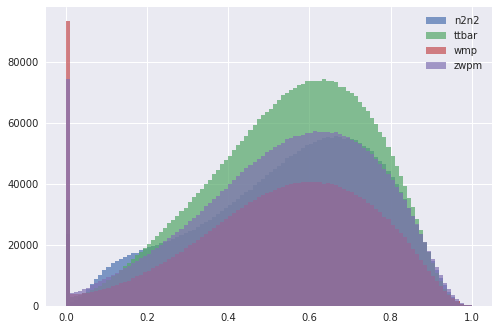

The amount is :  6


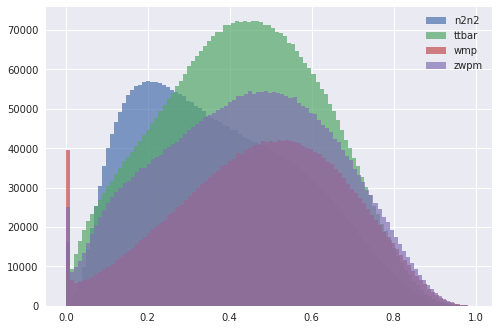

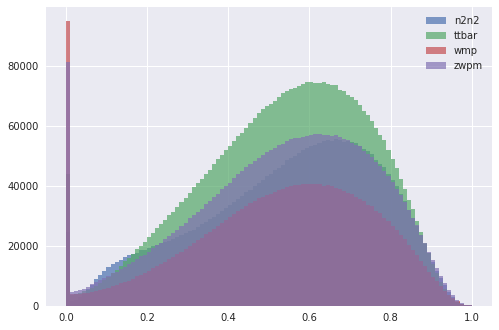

The amount is :  7


In [54]:
for k in range(1,14):
    rads = ['n2n2','ttbar','wmp','zwpm']
    n21_dict = {}
    n32_dict = {}
    no_of_misses = {}

    for rad in rads:
        n21 = []
        n32 = []
        for i in range(1,11):
            f = open('/home/blizzard/Datasets/NSubJet/R80/' + rad + '3' + str(i) + '.p5')
            line = f.readline()
            while line:
                if line != ";\n" or "\n":
                    comb_list = line.split(';')
                    n21_arr = comb_list[0].split(',')
                    n32_arr = comb_list[1].split(',')
                    n21_arr.sort(reverse=True)
                    n32_arr.sort(reverse=True)

                    for i in range(k):
                        try:
                            if float(n21_arr[i]) <= 1 and float(n32_arr[i]) <= 1:
                                n21.append(float(n21_arr[i]))
                                n32.append(float(n32_arr[i]))
                        except:
                            pass
                        
                    line = f.readline()
        n21_dict[rad] = n21
        n32_dict[rad] = n32
    
    print('The amount is : ',k)

    for rad in rads:
        ptl.hist(n21_dict[str(rad)],bins=100,alpha=0.7)
        ptl.legend(rads)
    ptl.show()

    for rad in rads:
        ptl.hist(n32_dict[str(rad)],bins=100,alpha=0.7)
        ptl.legend(rads)
    ptl.show()
